In [4]:
import pandas as pd
import numpy as np
from operator import itemgetter
from matplotlib import pyplot as plt

def randExp(lamb,size=1):    
    pt = np.random.rand(size)
    return (-1/lamb)*np.log(pt)


def simulacion(LLEGADAS):
    # INICIALIZACION DE LAS VARIABLES NECESARIAS  
    enlaces = np.full(L,C)
    usuarios = np.full((M,2),0)
    #import random
    #r=random.randint(0,L-1)
    #enlaces[r]=0
    #print(r)
    #print(enlaces)

    FEL = []           
    
    
    # INICIALIZACION DE LA FEL
    for i in range(M):
        FEL.append((i,randExp(lamb)[0])) 
    FEL.sort(key=itemgetter(1))
    
    # SIMULACION 
    # Criterio de parada, se ejecutara la situacion hasta que se registren una cantidad de arribos igual a LLEGADAS
    while usuarios[:,1].sum() <= LLEGADAS:
        eventoActual = FEL.pop(0)
    
        # Se identifica si el evento corresponde a una llegada al enlace o una salidad de este
        # Si su identificados es menor que la cantidad M de usuarios corresponde a un evento de llegada
        # Si su identificados es mayor que la cantidad M de usuarios corresponde a un evento de salida
        if eventoActual[0] < M:
            #print("Evento de llegada")
            idEvento = eventoActual[0]

            usuarios[idEvento,1] += 1
            
            if np.all(enlaces[dfRutas['RUTA'][idEvento]] > 0):
                #Se le resta 1 a la capacidad de cada enlace
                enlaces[dfRutas['RUTA'][idEvento]] -= 1
                
                # Se registra en la FEL la salida del usuario cuando finalice su atencion
                tiempoSalida = eventoActual[1] + randExp(miu)[0]
                FEL.append((idEvento + M, tiempoSalida))
                FEL.sort(key=itemgetter(1))
            else:
                usuarios[idEvento,0] += 1
                
                # Se registra en la FEL el usuario que no pudo ser atentido para que intente nuevamente en el futuro
                tiempoEntrada = eventoActual[1] + randExp(lamb)[0]
                FEL.append((idEvento, tiempoEntrada))
                FEL.sort(key=itemgetter(1))
                  
        else:
            #print("Evento de salida")
            idEvento = eventoActual[0] - M
            enlaces[dfRutas['RUTA'][idEvento]] += 1
            
            
            # Se registra en la FEL el usuario que acaba de ser atendido para que en el futuro vuelva a solicitar un canal
            tiempoEntrada = eventoActual[1] + randExp(lambPrima)[0]
            FEL.append((idEvento, tiempoEntrada))
            FEL.sort(key=itemgetter(1))
    
    #print(usuarios[:,0]/usuarios[:,1])
           
    dfRutas["Prob Bloqueo"] = usuarios[:,0]/usuarios[:,1]
    return usuarios[:,0].sum()/usuarios[:,1].sum()




ro = 0.3
t_ON = 0.001
t_OFF = (t_ON/ro) - t_ON
lamb = 1/(t_ON + t_OFF)
lambPrima = 1/(t_OFF)
miu = 1/(t_ON)
P_total_por_capacidad = []
Capacidad_enlaces = []

red = "BLSR-2"
dfRutas = pd.read_csv("./Rutas/"+ red+".rut",header=None)
dfRutas= dfRutas[0].str.split('\t', expand=True)
N = int(dfRutas[3][1]) # Número de nodos de la red
L = int(dfRutas[3][2]) # Número de enlaces unidireccionales
CXN = int(dfRutas[3][0])
M = N*(N-1) *CXN # Numero de usuarios
dfRutas = dfRutas[dfRutas[0]!=dfRutas[1]][6:].reset_index(drop=True)
C = dfRutas.iloc[:,3:].apply(pd.value_counts).sum(axis=1).max()
dfRutas["RUTA"] = dfRutas.iloc[:,3:].apply(
      lambda x: [i for i in x.dropna().astype(int)],
      axis=1
  )


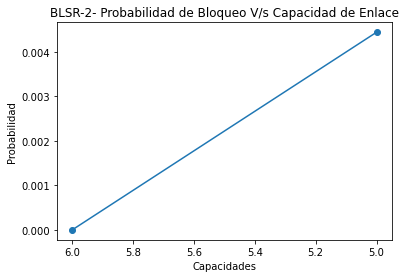

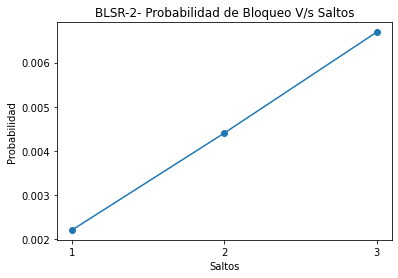

In [5]:

P = 0
while (P < 10**-3):
    # Ejecución del simulador de la Tarea 1 con la modificaciones mencionadas
    P = simulacion(10**6)
    if ((((((P*(1-P))/10**6)**0.5)*1.96)<0.0250) and 10**6 > 1000):
        P_total_por_capacidad.append(P)
        Capacidad_enlaces.append(C)

    C -=1


plt.plot(Capacidad_enlaces, P_total_por_capacidad, "o-")

plt.xlabel("Capacidades")
plt.ylabel("Probabilidad")
plt.title(red +"- Probabilidad de Bloqueo V/s Capacidad de Enlace")
ax = plt.gca()
ax.invert_xaxis()
plt.savefig("P-"+str(red) +" Normal" +".jpeg")

plt.show()


dfRutas = dfRutas[[0,1,2,"Prob Bloqueo"]]
dfRutas.groupby(2).mean()
Prob_Bloque_Por_Canales = dfRutas.groupby(2).mean()


plt.plot(Prob_Bloque_Por_Canales.index, Prob_Bloque_Por_Canales['Prob Bloqueo'], "o-")

plt.xlabel("Saltos")
plt.ylabel("Probabilidad")
plt.title(red +"- Probabilidad de Bloqueo V/s Saltos")
plt.savefig("S-"+str(red)+" Normal" +".jpeg")

plt.show()
#plot(kind="line",xlabel="Saltos",ylabel="Probabilidad de Bloqueo",title= red +" - Probabilidad de Bloqueo V/s Saltos")


In [6]:
dfRutas

,0,1,2,Prob Bloqueo
0,0,1,1,0.002225
1,0,1,3,0.006971
2,0,2,2,0.004051
3,0,2,2,0.004792
4,0,3,3,0.007285
5,0,3,1,0.002227
6,1,0,3,0.006723
7,1,0,1,0.002266
8,1,2,1,0.002464
9,1,2,3,0.006481
